<a href="https://colab.research.google.com/github/tprototype/deep-learning/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MSFT Stock Price Prediction

In [1]:
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential

In [2]:
from math import ceil
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### Getting Dataset

In [3]:
df = pd.read_csv('Microsoft_Stock.csv') 

In [15]:
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y %H:%M:%S')

In [17]:
df.index = df['Date']

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
4/1/2015 16:00:00,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
4/2/2015 16:00:00,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
4/6/2015 16:00:00,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
4/7/2015 16:00:00,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4/8/2015 16:00:00,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [18]:
new_df = df[['Close']]

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Stock Price of Microsoft over the Years')

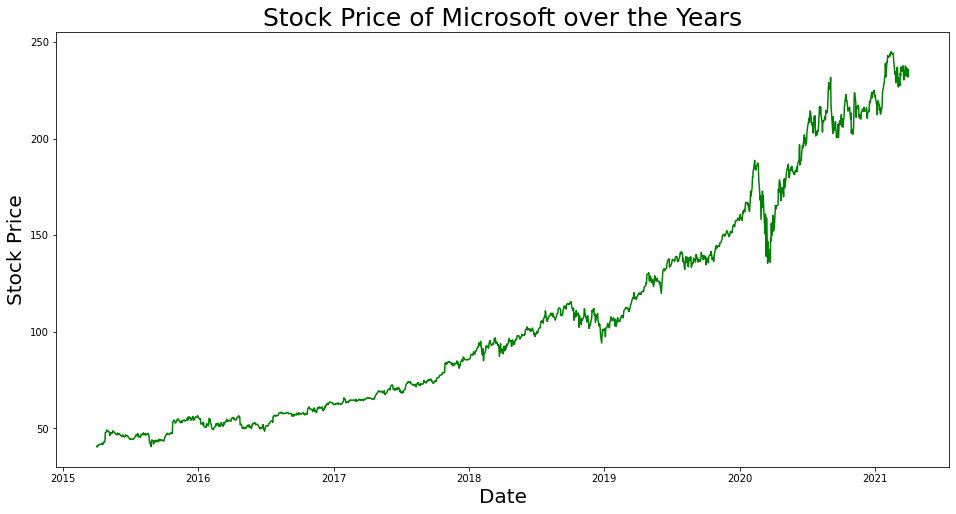

In [19]:
plt.figure(figsize=(16,8))
plt.plot(new_df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Microsoft over the Years',size=25)

### Preprocessing

In [20]:
size = new_df.shape[0]

In [21]:
size

1511

In [22]:
new_df.isna().sum()

Close    0
dtype: int64

#### Train and test dataset

In [23]:
train_df = new_df[:ceil(size*0.75)]
test_df = new_df[ceil(size*0.75):]

In [24]:
train_df.tail(2)

,Close
Date,
2019-09-30 16:00:00,139.03
2019-10-01 16:00:00,137.07


In [25]:
test_df.head()

,Close
Date,
2019-10-02 16:00:00,134.65
2019-10-03 16:00:00,136.28
2019-10-04 16:00:00,138.12
2019-10-07 16:00:00,137.12
2019-10-08 16:00:00,135.67


### Prepare x_train and y_train

In [26]:
dataset = new_df.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []

# creating training data set from first 75% data
for i in range(40,ceil(size*0.75)):
    x_train.append(scaled_data[i-40:i,0])
    y_train.append(scaled_data[i,0])

# feature is price of past 40 days and output is price of today

In [27]:
# prev two days price and today's price for first row in train data
print(x_train[0][38:],y_train[0])

[0.03575965 0.03497802] 0.03209574987787003


In [28]:
len(x_train[0])

40

In [29]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
x_train.shape

(1094, 40)

In [31]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [32]:
y_train[1093]

0.4727894479726428

In [33]:
x_train.shape

(1094, 40, 1)

### Model Creation

In [34]:
model = Sequential()

model.add(LSTM(50,input_shape=(40,1),return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
35/35 [==============================] - 6s 42ms/step - loss: 5.2006e-04
Epoch 2/5
35/35 [==============================] - 1s 42ms/step - loss: 1.2691e-04
Epoch 3/5
35/35 [==============================] - 2s 44ms/step - loss: 1.1540e-04
Epoch 4/5
35/35 [==============================] - 2s 61ms/step - loss: 1.1160e-04
Epoch 5/5
35/35 [==============================] - 2s 60ms/step - loss: 1.0923e-04


In [39]:
x_test, y_test = [] , []
for i in range(ceil(size*0.75),size):
    x_test.append(scaled_data[i-40:i,0])
    y_test.append(scaled_data[i,0])

In [40]:
y_test[0]

0.46096726917440156

In [41]:
x_test = np.array(x_test)

In [42]:
x_test.shape

(377, 40)

In [43]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [44]:
x_test.shape

(377, 40, 1)

In [45]:
y_pred = model.predict(x_test)

12/12 [==============================] - 1s 13ms/step


In [46]:
pred = scaler.inverse_transform(y_pred)

In [47]:
pred = np.reshape(pred, (pred.shape[0],))

In [48]:
pred.shape

(377,)

In [49]:
pred[0:3]

array([140.88408, 140.68112, 140.46193], dtype=float32)

In [50]:
# RMSE
np.sqrt(np.mean(np.power((test_df['Close'].values,pred),2)))

192.3262507383426

In [51]:
test_df['pred'] = pred

<ipython-input-51-6cf3682e3a00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pred'] = pred


In [52]:
test_df.head()

,Close,pred
Date,,
2019-10-02 16:00:00,134.65,140.884079
2019-10-03 16:00:00,136.28,140.681122
2019-10-04 16:00:00,138.12,140.461929
2019-10-07 16:00:00,137.12,140.332062
2019-10-08 16:00:00,135.67,140.211807


In [53]:
test_df['Close'].values.shape

(377,)

### Actual

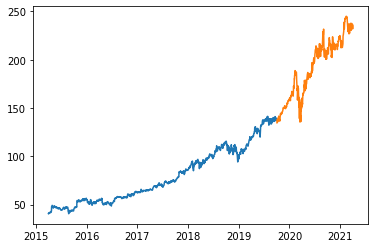

In [54]:
plt.plot(train_df['Close'])
plt.plot(test_df['Close'])
    

### Predicted

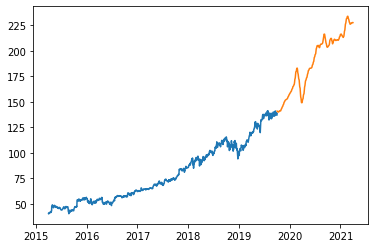

In [55]:
plt.plot(train_df['Close'])
plt.plot(test_df['pred'])

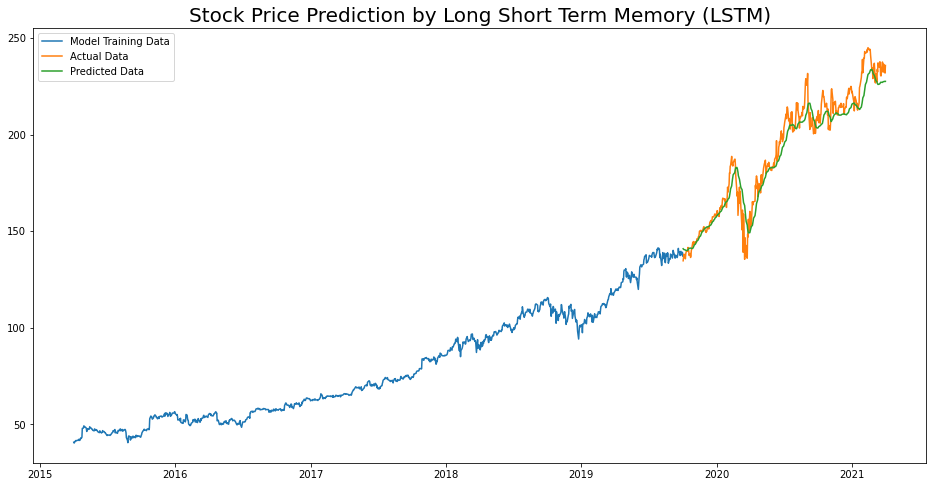

In [58]:
plt.figure(figsize=(16,8))
plt.plot(train_df['Close'])
plt.plot(test_df['Close'])
plt.plot(test_df['pred'])
plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
plt.legend(['Model Training Data','Actual Data','Predicted Data'])